# Benchmarks

## Initialize

In [69]:
#library(Rmisc)
library(dtplyr)
library(tidyverse)
library(glue)
library(arrow)
library(patchwork)
library(data.table)
library("jsonlite")
library(ggthemes)

In [70]:
base_path = "/home/jakobs"

project_path = glue("{base_path}/data")
experiment = '231117'
experiment_path = glue("{project_path}/{experiment}")

endpoints_md = endpoint_defs = arrow::read_feather(glue("{base_path}/data/endpoints_epic_md.feather")) %>% filter(n_epic>=100)
endpoints = endpoint_defs$endpoint

In [71]:
base_size = 8
title_size = 10
facet_size = 9
geom_text_size=3
theme_set(theme_classic(base_size = base_size) + 
          theme(strip.background = element_blank(), plot.title=element_text(size=title_size, hjust=0), 
                strip.text.x = element_text(size = facet_size),axis.title=element_text(size=10), axis.text=element_text(size=8, color="black"),
                legend.position="bottom", axis.line = element_line(size = 0.2), axis.ticks=element_line(size=0.2), panel.grid.major.y=element_line()))

In [72]:
endpoint_map = endpoint_defs$phecode_string
names(endpoint_map) =  endpoint_defs$endpoint
endpoint_order = endpoints

In [73]:
endpoint_selection = c(
    # generally very important
    "phecode_202", # Diabetes mellitus
    "phecode_401",	#Hypertension"  
    "phecode_404", # Ischemic heart disease   
    "phecode_404-1", # Myocardial infarction [Heart attack]
    "phecode_431-11", # Cerebral infarction [Ischemic stroke]
    "phecode_424", # Heart failure

    
    "phecode_059-1", # COVID 19
    "phecode_468", # Pneumonia
    "phecode_474", # Chronic obstructive pulmonary disease [COPD]
      
    "phecode_286-2", #	Major depressive disorder
    "phecode_324-11", #Parkinson's Disease
    "phecode_328", # Dementias and cerebral degeneration

    
    "phecode_164", # Anemia
    "phecode_726-1", # Osteoporosis
    "phecode_371", # Cataract
    "phecode_374-42", # Diabetic retinopathy
    "phecode_374-5", # Macular degeneration
    "phecode_375-1", # Glaucoma
    
    
    "phecode_103", # Malignant neoplasm of the skin
    "phecode_101", # Malignant neoplasm of the digestive organs
    "phecode_102", # LUNG CANCER
    
    "phecode_583", # Chronic kidney disease    
    "phecode_542", # Chronic liver disease and sequelae    
    "OMOP_4306655" # All-Cause Death
    
    # also generally important and relevant
    #"phecode_440-3", # Pulmonary embolism
    #"phecode_468-1",	#Viral pneumonia
#     "phecode_460-2",	#Acute lower respiratory infection
    #"phecode_388" # Blindness and low vision
      # generally important and fun to check
   # "phecode_374-3", # Retinal vascular changes and occlusions
    #"phecode_665", # Psoriasis
#     "phecode_121", # Leukemia
    # important for eye
#     "phecode_705-1", # Rheumatoid arthritis
)

endpoints_common = c(
   'phecode_164', #Anemia
 'phecode_705-1', #Rheumatoid arthritis
 'phecode_328', #Dementias and cerebral degeneration
 'phecode_328-1', #Alzheimer's disease
 'phecode_401', #Hypertension
 'phecode_202', #Diabetes mellitus
 'phecode_416-21', #Atrial fibrillation
 'phecode_404-1', #Myocardial infarction [Heart attack]
 'phecode_424', #Heart failure
 'phecode_468', #Pneumonia
 'phecode_474', #Chronic obstructive pulmonary disease [COPD]
 'phecode_583', #Chronic kidney disease
 'OMOP_4306655' #All-Cause Death
    )
    
endpoints_cardio = c(
    'phecode_438-11',   #  "Abdominal aortic aneurysm",
    'phecode_440-3',#  "Pulmonary embolism", # intervention
    'phecode_413-21',#  "Aortic stenosis", # intervention
    'phecode_400'#  "Rheumatic fever and chronic rheumatic heart diseases",	
)

endpoints_eye= c(
    'phecode_374-5', #Macular degeneration
 'phecode_374-51', #Age-related macular degeneration
 'phecode_374-42', #Diabetic retinopathy
 'phecode_371', #Cataract
 'phecode_388', #Blindness and low vision
 'phecode_367-5', #Uveitis
 'phecode_389-1' #Ocular pain
)

In [74]:
endpoint_defs = endpoint_defs %>% 
    mutate(name = phecode_string) %>%
    mutate(name = 
           case_when( 
               phecode_string == "Myocardial infarction [Heart attack]"~"Myocardial infarction",
               phecode_string == "Cerebral infarction [Ischemic stroke]"~"Ischemic stroke",
               phecode_string == "Chronic obstructive pulmonary disease [COPD]"~"Chronic obstructive pulmonary disease",
               phecode_string == "Mitral valve insufficiency"~"Mitral insufficiency",
               phecode_string == "Parkinson's disease (Primary)"~"Parkinson's disease",
               phecode_string == "Suicide ideation and attempt or self harm"~"Suicide attempt",
               phecode_string == "Ischemic heart disease"~"Coronary heart disease",
               phecode_string == "Chronic kidney disease"~"Chronic kidney disease",
               phecode_string == "Rheumatic fever and chronic rheumatic heart diseases"~"Rheumatic heart disease",
               phecode_string == "Abdominal aortic aneurysm"~"Abdominal aortic aneurysm",
                  TRUE ~ name)
           )
            
endpoint_map = endpoint_defs$name
names(endpoint_map) =  endpoint_defs$endpoint
#endpoint_order = (endpoint_defs %>% arrange(as.numeric(phecode)))$endpoint
endpoint_order = endpoint_selection

## Load data

# Load Benchmarks

In [75]:
#today = substr(Sys.time(), 0, 10) # YYYY-MM-DD
today = '231117'
name = glue("benchmarks_{today}")
benchmark_endpoints = arrow::read_feather(glue("{experiment_path}/{name}.feather")) %>% left_join(endpoints_md) 

Joining with `by = join_by(endpoint)`


In [76]:
benchmark_endpoints %>% group_by(endpoint, score)  %>% summarise(cindex=mean(cindex)) %>% group_by(score) %>% summarise(mean(cindex)) %>% arrange(`mean(cindex)`)

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.


score,mean(cindex)
<chr>,<dbl>
Retina,0.5695564
Age+Sex,0.5929907
SCORE2,0.5943669
ASCVD,0.5959851
SCORE2+Retina,0.6038248
ASCVD+Retina,0.6052626
Age+Sex+Retina,0.6060296


In [77]:
endpoints_sorted = (benchmark_endpoints %>% 
    filter(score == "Age+Sex+Retina") %>% 
    group_by(endpoint, score) %>% 
    summarise(cindex=mean(cindex, na.rm=TRUE)) %>% 
    arrange(cindex) %>% ungroup())$endpoint

`summarise()` has grouped output by 'endpoint'. You can override using the `.groups` argument.


In [78]:
categories_sorted = (endpoint_defs %>% distinct(phecode_category))$phecode_category

# CALCULATE THE FREQ of significant!

In [79]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("Age+Sex", "Age+Sex+Retina")#, "AgeSexRetina")

In [80]:
options(repr.matrix.max.rows=1500, repr.matrix.max.cols=200)

In [81]:
library(ggdist)

In [82]:
table_2_pre = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    group_by(endpoint, score, phecode_string, phecode_category) %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    group_by(endpoint, phecode_string, phecode_category) %>%
    median_qi(delta) %>% filter(endpoint %in% endpoints_md$endpoint)
    #mutate(posdelta = case_when(delta>=0 ~ "pos", delta < 0 ~"neg"))
#table_2_pre %>% head()
print(nrow(table_2_pre))

cat("nrows with positive lower q of delta:", nrow(table_2_pre %>% filter(.lower > 0)))
cat("\nnrows with negative lower q of delta:", nrow(table_2_pre %>% filter(.lower <= 0)))
cat("\nnrows with positive delta:", nrow(table_2_pre %>% filter(delta > 0)))
cat("\nnrows with negative delta:", nrow(table_2_pre %>% filter(delta <= 0)))

[1] 173
nrows with positive lower q of delta: 59
nrows with negative lower q of delta: 114
nrows with positive delta: 117
nrows with negative delta: 56

In [83]:
table_2_significant = table_2_pre %>%
    filter(delta > 0) %>%
    filter(.lower > 0) %>%
    arrange(endpoint)

table_2_pre %>%
    filter(delta > 0) %>%
    filter(.lower > 0) %>%
    arrange(endpoint) %>% 
    mutate_if(is.numeric, round, 3) %>%
    write_csv(glue("outputs/SupplTable2_SignificantEndpoints_CropRatio-{crop_ratio}.csv"))

table_2_pre %>%
    arrange(endpoint) %>% 
    mutate_if(is.numeric, round, 3) %>%
    write_csv(glue("outputs/SupplTable2_DeltasAllEndpoints_CropRatio-{crop_ratio}.csv"))

glue("outputs/SupplTable2_SignificantEndpoints_CropRatio-{crop_ratio}.csv")

In [84]:
og_counts = table_2_pre %>% group_by(phecode_category) %>% count() %>% select(phecode_category, n) %>% rename(N_total = n)
tmp = table_2_significant %>% group_by(phecode_category) %>% count() %>% left_join(og_counts) %>% mutate(Percent_Significant=n/ N_total) 
#%>%        unite(s, n, N_total, sep = "/", remove=FALSE)
tmp %>%  
mutate_if(is.numeric, round, 3) %>%
write_csv(glue("outputs/SupplTable2_RatioOfSignificantEndpoints.csv"))

Joining with `by = join_by(phecode_category)`
`mutate_if()` ignored the following grouping variables:
• Column `phecode_category`


## delta c-idx with negative values

`summarise()` has grouped output by 'endpoint', 'phecode_string'. You can override using the `.groups` argument.


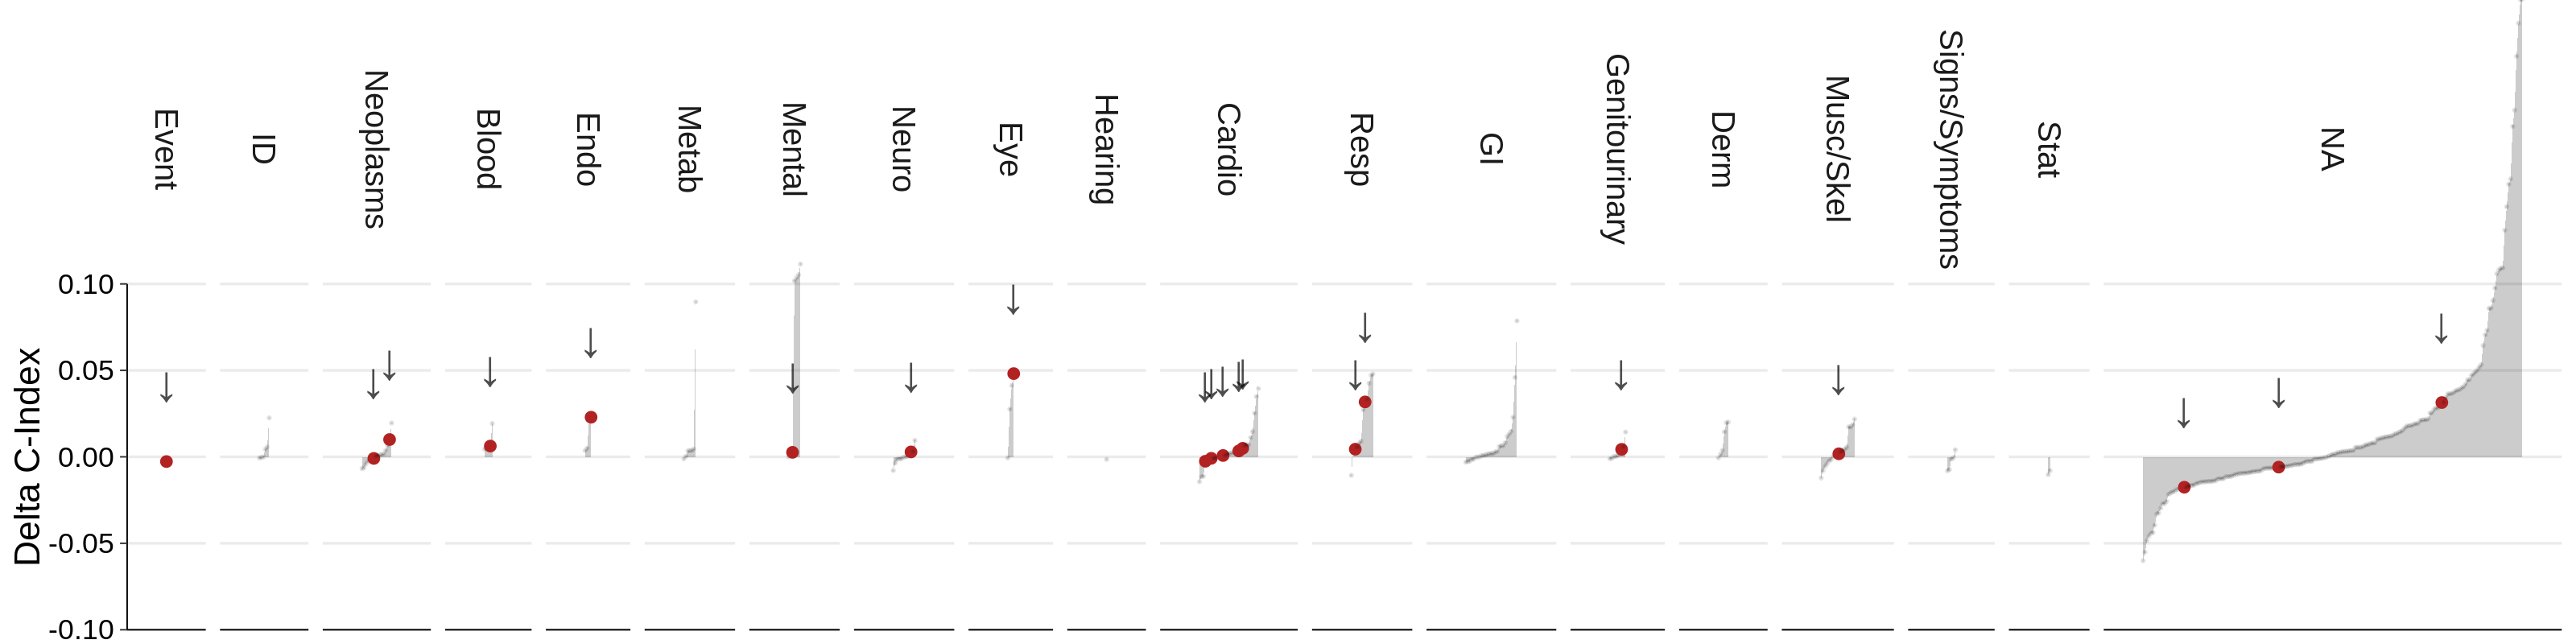

In [85]:
geom.text.size = 1

temp = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>%
    group_by(endpoint, phecode_string, phecode_category) %>%
    summarise(delta = median(delta)) %>%
    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted))

endpoint_order = (temp %>% arrange(delta))$endpoint

temp = temp %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number())

ggplot(temp) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=delta), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=delta, color=highlight, size=highlight, alpha=highlight)) +
    geom_text(data=temp %>% filter(highlight=="YES"), aes(x=endpoint, y=delta+0.045, label="↓"), color="black", size=5, alpha=0.7) +
#     geom_text(data=tmp,
#               mapping = aes(x = -Inf, y = -Inf, label =s),
#               hjust   = -0.1, 
#               vjust   = -13) + 
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y=glue("Delta C-Index"))+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(-0.1, 0.1), clip = "off")+
    scale_y_continuous(expand=c(0, 0))+
    scale_x_discrete(expand=expansion(add=20))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major=element_blank(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") 
    
    #geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)

## delta c-idx with positive values (negative set to 0)

`summarise()` has grouped output by 'endpoint', 'phecode_string'. You can override using the `.groups` argument.


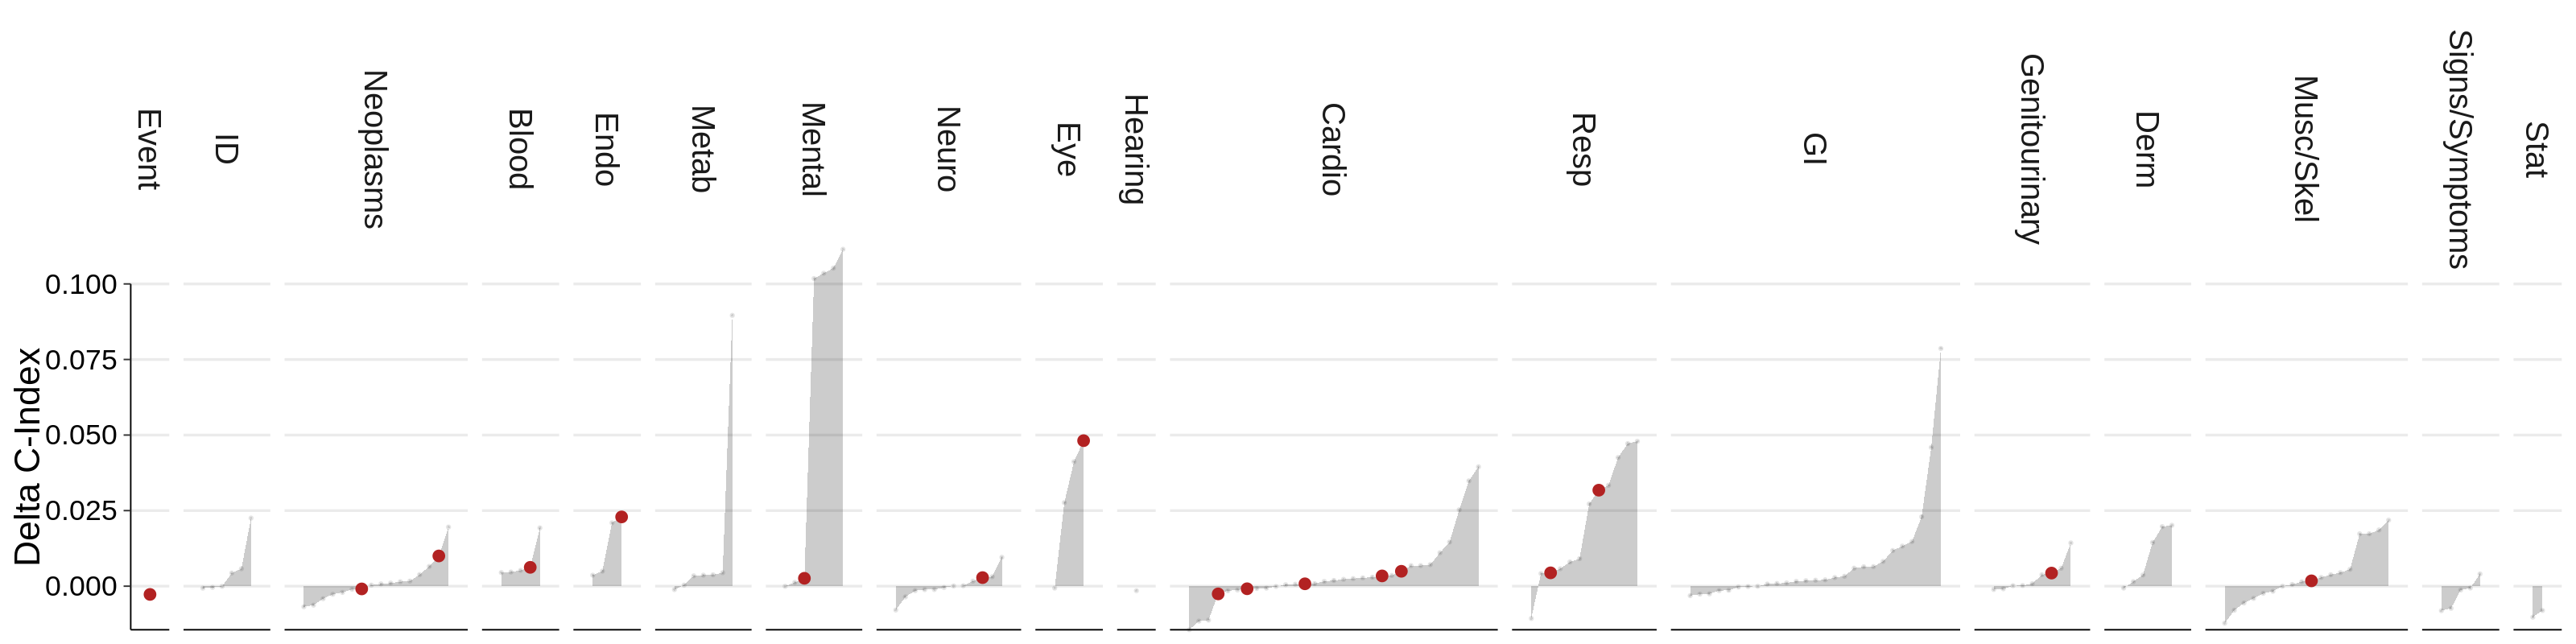

In [86]:
plot_width = 10; plot_height=2.5; plot_res = 320
options(repr.plot.width = plot_width, repr.plot.height = plot_height, repr.plot.res=plot_res)

scores_plot = c("Age+Sex", "Age+Sex+Retina")#, "AgeSexRetina")

temp_pos = benchmark_endpoints %>% 
    filter(score %in% scores_plot) %>% 
    mutate(score = factor(score, levels=scores_plot)) %>%
    mutate(endpoint = factor(endpoint, levels=endpoints_sorted)) %>%
    ungroup() %>%
    pivot_wider(names_from=score, values_from=cindex) %>% 
    mutate(id = row_number()) %>%
    mutate(delta = `Age+Sex+Retina`-`Age+Sex`) %>% filter(endpoint %in% endpoints_md$endpoint)

temp_pos = temp_pos %>%
    group_by(endpoint, phecode_string, phecode_category) %>%
    summarise(delta = median(delta)) %>%
    mutate(pos = case_when(delta>=0 ~ "pos", delta < 0 ~"neg")) %>%
    mutate(endpoint = fct_reorder(endpoint, delta)) %>%
    mutate(highlight = case_when(endpoint %in% endpoint_selection ~ "YES", TRUE ~ "NO")) %>%# %>% filter(endpoint %in% endpoint_sample)
    mutate(phecode_category = factor(phecode_category, levels=categories_sorted))

endpoint_order = (temp_pos %>% arrange(delta))$endpoint

temp_pos = temp_pos %>% mutate(endpoint = factor(endpoint, levels=endpoint_order)) %>% ungroup() %>% arrange(endpoint) %>% group_by(phecode_category) %>% mutate(endpoint = row_number())

fig3a = ggplot(temp_pos) +
    geom_ribbon(aes(x=endpoint, ymin=0, ymax=delta), fill="black", alpha=0.2)+
    geom_point(aes(x=endpoint, y=delta, color=highlight, size=highlight, alpha=highlight)) +
    #geom_text(data=temp_pos %>% filter(highlight=="YES"), aes(x=endpoint, y=delta+0.015, label="↓"), color="black", size=5, alpha=0.7) +
    #geom_segment(aes(x=endpoint, xend=endpoint, y=0, yend=delta, color=highlight, size=highlight), alpha=0.5)+#+
    labs(x="Endpoints", y=glue("Delta C-Index"))+
    scale_color_manual(values=c("NO"="black", "YES"="firebrick"))+
    scale_alpha_manual(values=c("NO"=0.1, "YES"=1))+
    scale_size_manual(values=c("NO"=0.01, "YES"=1))+
    #scale_colour_manual(values = c("pos"="forestgreen", "neg" = "firebrick")) + 
    #coord_polar() +
    coord_cartesian(ylim=c(NA, 0.1), clip = "off")+
    scale_y_continuous(expand=c(0, 0))+
    scale_x_discrete(expand=expansion(add=2))+
    facet_grid(~phecode_category, scales="free_x", space="free_x")+#, switch=TRUE)+
    #facet_grid2(~phecode_category, scales = "free", independent = "all") + 
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        panel.grid.major=element_blank(), 
         strip.text = element_text(angle=270)) + 
    theme(legend.position="none") 
    
fig3a    
#geom_ribbon(aes(x=id, ymin=AgeSex, ymax=`Age+Sex+Retina`), fill="red", alpha=0.2)
#geom_violin(size=0.1)

In [87]:
plot_name = "SupplFigure3a_EPIC_Discrimination_PhenomeWide"
fig3a %>% ggsave(filename=glue("outputs/{plot_name}.pdf"), device="pdf", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
fig3a %>% ggsave(filename=glue("outputs/{plot_name}.png"), device="png", width=plot_width, height=plot_height, dpi=plot_res, limitsize=FALSE)
temp_pos %>% write_csv(glue("outputs/SupplFigure3a.csv"))

In [88]:
ukb = fread("UKB_SupplTable1_DiscriminativePerformanceAll_CropRatio-0.66.csv")
ukb

phecode_category,endpoint,phecode_string,Age+Sex,Age+Sex+Retina,delta
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Blood,phecode_168-1,Hypo-coagulability,"0.655 (0.613, 0.691)","0.486 (0.438, 0.547)","-0.166 (-0.212, -0.104)"
GI,phecode_552-1,Cholangitis,"0.599 (0.575, 0.642)","0.566 (0.539, 0.612)","-0.035 (-0.049, -0.013)"
Blood,phecode_180,Other disorders involving the immune mechanism,"0.635 (0.612, 0.676)","0.602 (0.574, 0.647)","-0.032 (-0.057, -0.008)"
Musc/Skel,phecode_721-6,Baker's cyst [popliteal cyst],"0.627 (0.59, 0.665)","0.596 (0.561, 0.632)","-0.031 (-0.058, -0.012)"
GI,phecode_520-15,Incisional hernia,"0.585 (0.543, 0.618)","0.552 (0.521, 0.583)","-0.031 (-0.067, 0.005)"
Musc/Skel,phecode_702,Infective and reactive arthropathies,"0.574 (0.542, 0.6)","0.544 (0.509, 0.573)","-0.03 (-0.054, 0.001)"
Cardio,phecode_430-1,Nontraumatic subarachnoid hemorrhage,"0.643 (0.596, 0.675)","0.61 (0.569, 0.651)","-0.03 (-0.055, 0)"
Neuro,phecode_329-1,Memory loss,"0.615 (0.583, 0.657)","0.588 (0.544, 0.629)","-0.027 (-0.055, -0.005)"
GI,phecode_532-4,Volvulus,"0.596 (0.554, 0.63)","0.573 (0.527, 0.6)","-0.027 (-0.042, -0.005)"


In [89]:
epic_agg <- benchmark_endpoints %>%
  filter(score %in% scores_plot) %>%
  mutate(score = factor(score, levels = scores_plot)) %>%
  mutate(endpoint = factor(endpoint, levels = endpoints_sorted)) %>%
  ungroup() %>%
  pivot_wider(names_from = score, values_from = cindex) %>% 
  mutate(id = row_number()) %>%
  mutate(delta = `Age+Sex+Retina` - `Age+Sex`) %>%
  filter(endpoint %in% endpoints_md$endpoint) %>%
  group_by(endpoint, phecode_string, phecode_category) %>%
  median_qi(`Age+Sex`, `Age+Sex+Retina`, delta) %>%
  mutate(endpoint = fct_reorder(endpoint, delta)) %>%
  mutate(phecode_category = factor(phecode_category, levels = categories_sorted))

In [90]:
epic <- epic_agg %>%
  mutate(epic_agesex = glue("{round(`Age+Sex`, 3)} ({round(`Age+Sex.lower`, 3)}, {round(`Age+Sex.upper`, 3)})"),
         epic_agesexretina = glue("{round(`Age+Sex+Retina`, 3)} ({round(`Age+Sex+Retina.lower`, 3)}, {round(`Age+Sex+Retina.upper`, 3)})"),
         epic_delta = glue("{round(delta, 3)} ({round(`delta.lower`, 3)}, {round(`delta.upper`, 3)})")
        ) %>%
  select(epic_agesex, epic_agesexretina, epic_delta)

Adding missing grouping variables: `endpoint`, `phecode_string`


In [91]:
st4 = ukb %>% left_join(epic, by=c("endpoint", "phecode_string")) %>% as_tibble()

In [92]:
st4_clean <- st4 %>%
  mutate(across(everything(), ~ replace_na(., ""), .names = "{col}")) %>%
  mutate(
    delta_lower = as.numeric(sub(".*\\((.*),.*", "\\1", delta)),
    delta_upper = as.numeric(sub(".*, (.*)\\).*", "\\1", delta)),
    epic_delta_lower = as.numeric(sub(".*\\((.*),.*", "\\1", epic_delta)),
    epic_delta_upper = as.numeric(sub(".*, (.*)\\).*", "\\1", epic_delta))
  ) %>%
  mutate(
    sign_ukb = case_when(
      delta_lower > 0 & delta_upper > 0 ~ "+",
      delta_lower < 0 & delta_upper < 0 ~ "-",
      TRUE ~ "ns"
    ),
    sign_epic = case_when(
    is.na(epic_delta_lower) | is.na(epic_delta_upper) ~ NA_character_,
      epic_delta_lower > 0 & epic_delta_upper > 0 ~ "+",
      epic_delta_lower < 0 & epic_delta_upper < 0 ~ "-",
      TRUE ~ "ns"
    ) 
  ) %>% 
    arrange(epic_delta_lower) %>% 
    select(-delta_lower, -delta_upper, -epic_delta_lower, -epic_delta_upper) %>%
    mutate(sign = glue("{sign_ukb}|{sign_epic}"))

In [93]:
st4_clean %>% filter(!is.na(sign_epic)) %>% group_by(sign_ukb, sign_epic, sign) %>% tally()

sign_ukb,sign_epic,sign,n
<chr>,<chr>,<glue>,<int>
+,+,+|+,40
+,-,+|-,10
+,ns,+|ns,55
-,ns,-|ns,3
ns,+,ns|+,15
ns,-,ns|-,7
ns,ns,ns|ns,42


In [94]:
st4_clean %>% filter(!is.na(sign_epic)) %>% filter(sign=="+|+")

phecode_category,endpoint,phecode_string,Age+Sex,Age+Sex+Retina,delta,epic_agesex,epic_agesexretina,epic_delta,sign_ukb,sign_epic,sign
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<glue>,<glue>,<glue>,<chr>,<chr>,<glue>
GI,phecode_528,Nausea and vomiting,"0.601 (0.591, 0.609)","0.609 (0.599, 0.616)","0.008 (0.002, 0.013)","0.624 (0.603, 0.648)","0.627 (0.605, 0.65)","0.002 (0.001, 0.004)",+,+,+|+
Cardio,phecode_424,Heart failure,"0.744 (0.737, 0.754)","0.759 (0.75, 0.769)","0.014 (0.008, 0.02)","0.768 (0.754, 0.785)","0.772 (0.758, 0.79)","0.003 (0.001, 0.006)",+,+,+|+
Neuro,phecode_350,Other symptoms involving nervous system,"0.697 (0.683, 0.708)","0.718 (0.705, 0.729)","0.02 (0.012, 0.029)","0.801 (0.784, 0.805)","0.804 (0.789, 0.808)","0.003 (0.001, 0.005)",+,+,+|+
Blood,phecode_160,Nutritional anemias,"0.6 (0.589, 0.608)","0.628 (0.618, 0.636)","0.028 (0.02, 0.035)","0.617 (0.61, 0.628)","0.623 (0.611, 0.636)","0.005 (0.001, 0.009)",+,+,+|+
Resp,phecode_486,Other respiratory disorders,"0.651 (0.633, 0.665)","0.681 (0.662, 0.698)","0.03 (0.014, 0.042)","0.622 (0.583, 0.638)","0.635 (0.59, 0.653)","0.009 (0.001, 0.021)",+,+,+|+
Musc/Skel,phecode_703,Chrystal arthropathies,"0.765 (0.755, 0.774)","0.77 (0.76, 0.779)","0.006 (0.001, 0.011)","0.726 (0.697, 0.745)","0.729 (0.704, 0.749)","0.004 (0.002, 0.007)",+,+,+|+
Genitourinary,phecode_583,Chronic kidney disease,"0.721 (0.713, 0.73)","0.728 (0.719, 0.737)","0.007 (0.001, 0.012)","0.746 (0.728, 0.749)","0.749 (0.734, 0.755)","0.004 (0.002, 0.006)",+,+,+|+
Resp,phecode_483,Pleural effusion,"0.68 (0.667, 0.69)","0.691 (0.682, 0.704)","0.011 (0.004, 0.018)","0.637 (0.626, 0.653)","0.642 (0.631, 0.659)","0.004 (0.002, 0.006)",+,+,+|+
Cardio,phecode_401-1,Essential hypertension,"0.663 (0.66, 0.667)","0.675 (0.672, 0.679)","0.012 (0.01, 0.014)","0.639 (0.628, 0.651)","0.643 (0.634, 0.657)","0.004 (0.002, 0.007)",+,+,+|+


In [95]:
40/172

[1] 0.2325581

In [ ]:
st4_clean %>% filter(!is.na(sign_epic)) 

In [52]:
st4_clean %>% group_by(sign) %>% tally()## %>% filter(sign_ukb=="")

sign,n
<glue>,<int>
+ | +,40
+ | -,10
+ | NA,195
+ | ns,55
- | NA,26
- | ns,3
ns | +,15
ns | -,7
ns | NA,359


In [97]:
st4_clean %>% write_csv("outputs/SupplTable4_ukbepic_merged.csv")